# Workgroup 4

Members:
* Diego Alonso Gómez (20171738)
* Alexander Pacheco (20161901)

## Part 1

You have create your analysis based on the scripts r-notebook-experiment-on-orthogonal-learning and, python_notebook_experiment_on_orthogonal_learning.

Replicate Simulation Design 1 three times using different numbers of trials. So you have to use
* The equation of Y for the three cases now is: Y = 5*D + beta*X + rnorm(n)
* B = 50 , B = 100, B = 1000.
* Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
* Why does this happen? Give an econometric explanation of this.
* Label your axes and legends correctly your figures.

In [1]:
# We import some relevant packages for the analysis 
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd
import statsmodels.formula.api as smf
import pyreadr

# Simulation Design 1

B = 50

In [2]:
# Set seed
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [4]:
for i in range(0, B):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4
    #We reshape because in r when we sum a vector with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True )
        #Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

     # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [5]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

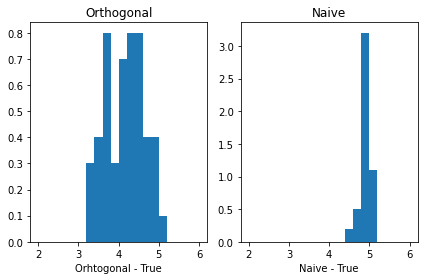

In [6]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

B = 100

In [57]:
# Set seed
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [58]:
for i in range(0, B):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4
    #We reshape because in r when we sum a vector with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) #Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

     # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [59]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

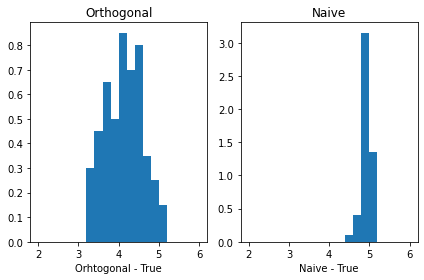

In [60]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

B = 1000

In [61]:
# Set seed
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [62]:
for i in range(0, B):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4
    #We reshape because in r when we sum a vector with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) #Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

     # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [63]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

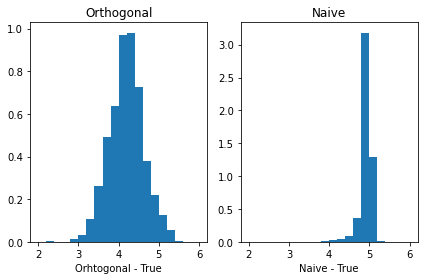

In [64]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

* ### Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?

First, we can see that, in the case of the Orthogonal approach, the distribution is more centered at 5 and resembles more a normal distribution with mean 5 . And for the Naive approach, we notice that it is more pulled towards 6.

A probably cause for this is that because the estimated beta is very close to the real value "5". That is, these values for the first graph (B=50) vary between 4.5 and 5.5 and for the other two graphs (B=100 especially) vary approximately between 4 and 6. On the other hand, in the Naive approach, the distribution shows that the estimated beta values are more centered on 5.5 or 6.

So, if we use the Naive approach we would not be able to make inference, that because this technique gives a slanted  estimator, probably because it does not takeinto account Neyman's Orthogonality problem.

- ### Why does this happen? Give an econometric explanation of this.

We do believe that Naive appoach is biased because the Orthogonality Principle is not being fullfiled with this technique.

To remember, the Orthogonality Principle consists in that there is no correlation between the regressor X and the perturbance term:

* Remembering our main equation: $Y=\alpha D+\beta'W+\epsilon$
* the Orthogonality Principle will consist in: $E[X~e]=0$

Therefore, when assumption 1 is violated, the partial derivatives will be different from 0 and the $𝛼$ will move as the previously estimated 𝛾 changes. The estimator will be biased, so inference will not be possible. 

# Double Lasso - Testing the Convergence Hypothesis

1. Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

2. Replicate the results using the next approaches:
- OLS
- Double LASSO using cross Validation (GLMNET in R and Sklearn in Python )
- Double Lasso using theoretical Lambda (HDM package both in R and Python)
- Double Lasso using method="partialling out", this is a direct way to get results from the HDM package, check the Python script for an example, and also you have to read the documentation for more details.
- Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

## 1.  Explanation of Double Lasso Approach:

The Double Lasso Approach is useful when we want to estimate a model with a large number of covariates relative to the number of observations. That because the Double Lasso method efficiently selects the relevant covariates for said estimation through two Lasso regression and an OLS one at the end. 

So, to explain this idea better, we privde an example where we want to estimate it:

\begin{equation}\label{original}
Y_t = \theta X_t + \beta 'W_t+ \epsilon_1 \tag{1}.
\end{equation}

Where $X_t$ is our variable of interest, and $W_t$ is a set of control variables.

The Double Lasso approach consists of estimating $(2)$ and $(3)$ via Lasso:

\begin{equation}\label{Y}
Y_t = \gamma_{YX} 'X_t+ \mu_{YX} \tag{2}
\end{equation}

\begin{equation}\label{D}
X_t = \gamma_{XW} 'W_t+ \mu_{XW} \tag{3}
\end{equation}

Once we run these regressions, we estimate the error of each equation, that is $\hat\mu_{YX}$ and $\hat\mu_{XW}$.

Finally, we estimate this last expression using OLS:

\begin{equation}\label{mu}
\hat\mu_{YX} = \alpha\hat\mu_{XW}+ \epsilon_2 \tag{4}
\end{equation}

## 2. Replicate the results using the next approaches:

#### Data Analysis

In [1]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [2]:
# I downloaded the data that the author used
growth_read = pyreadr.read_r("C:/Users/Hp/OneDrive/Documentos/GitHub/ECO224/Labs/data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

The dimension of our data set:

In [3]:
growth.shape

(90, 63)

We realize that we have $n=90$ observations and $p=63$ variables. Then, $p/n$ is not small. We expect that the method based on partialling-out with Lasso provides a higher quality estimate of $\beta_1$ than the least squares method.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', 1)

C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### OLS regression

In [6]:
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           0.000200
Time:                        17:45:57   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

#### We summarize the OLS results in the next table

In [7]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: p-value
pvalue_ols = reg_ols.summary2().tables[1]['P>|t|']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

table_1 = np.zeros( (1, 5) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols 
table_1[0,2] = pvalue_ols
table_1[0,3] = lower_ci
table_1[0,4] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error","P>|t|", "lower bound CI", "upper bound CI"  ])
table_1_pandas.index = [ "OLS" ]
table_1_pandas

,Estimator,Std. Error,P>|t|,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,0.756019,-0.0706,0.051844


The table show us that the coefficient  is not significant.

We now use the double lasso cross validation

In [8]:
# We create the main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D = growth['gdpsh465']

C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


#### Double Lasso using cross Validation (Sklearn in Python)

In [9]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y - lasso_model.fit( W, Y ).predict( W )
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D - lasso_model.fit( W, D ).predict( W )
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

# # output: estimated regression coefficient corresponding to the target regressor
est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# # output: std. error
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# # output: 95% confidence interval
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005828894477386548, tolerance: 2.3434976975716032e-05
  positive)
C:\Users\Hp\.conda\envs\r-tutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9972447000776437, tolerance: 0.007147912790119585
  positive)


In [10]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via partialling-out using lasso {partial_lasso_est}" )

Coefficient for D via partialling-out using lasso -0.04774655653302144


In [11]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

Summary Lasso Results:

In [12]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso  
table_2[0,1] = std_lasso   
table_2[0,2] = lower_ci_lasso
table_2[0,3] = upper_ci_lasso    


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "LASSO_CV" ]
table_2_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_CV,-0.047747,0.017705,-0.082926,-0.012567


In [13]:
table_3 = table_1_pandas.append(table_2_pandas)
table_3

,Estimator,Std. Error,P>|t|,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,0.756019,-0.070600,0.051844
LASSO_CV,-0.047747,0.017705,NaN,-0.082926,-0.012567


Partialling-out via Lasso provides a more precise estimate: $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.8\%,-2.2\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

#### Double Lasso using theoretical Lambda (HDM package)

In [14]:
res_Y = hdmpy.rlasso( W, Y, post=True ).est['residuals']
res_D = hdmpy.rlasso( W, D, post=True ).est['residuals']

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [15]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    0.000533
Time:                        17:45:59   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [17]:
table_3 = np.zeros( (1, 4) )

table_3[0,0] = est_lasso   
table_3[0,1] = std_lasso    
table_3[0,2] = lower_ci_lasso 
table_3[0,3] = upper_ci_lasso     


table_3_pandas = pd.DataFrame( table_3, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_3_pandas.index = [ "LASSO_THEOLAMBDA" ]
table_3_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_THEOLAMBDA,-0.049811,0.013858,-0.077347,-0.022276


#### Double Lasso using method="partialling out"

In [18]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")
lasso_direct

{'alpha': -0.04981144483733837,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.04981144483733837,
 'coefficient': -0.04981144483733837,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
     

In [19]:
est_lasso = lasso_direct["coefficients"]
std_lasso = lasso_direct["se"]
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [20]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso   
table_4[0,1] = std_lasso    
table_4[0,2] = lower_ci_lasso 
table_4[0,3] = upper_ci_lasso     


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO_DIRECT" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_DIRECT,-0.049811,0.015391,-0.079978,-0.019644


### Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure

In order to plot the main coefficients, we first summarize the results in the next table

In [21]:
tables=[table_1_pandas,table_2_pandas,table_3_pandas,table_4_pandas]
summary=pd.concat(tables)
summary

,Estimator,Std. Error,P>|t|,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,0.756019,-0.070600,0.051844
LASSO_CV,-0.047747,0.017705,NaN,-0.082926,-0.012567
LASSO_THEOLAMBDA,-0.049811,0.013858,NaN,-0.077347,-0.022276
LASSO_DIRECT,-0.049811,0.015391,NaN,-0.079978,-0.019644


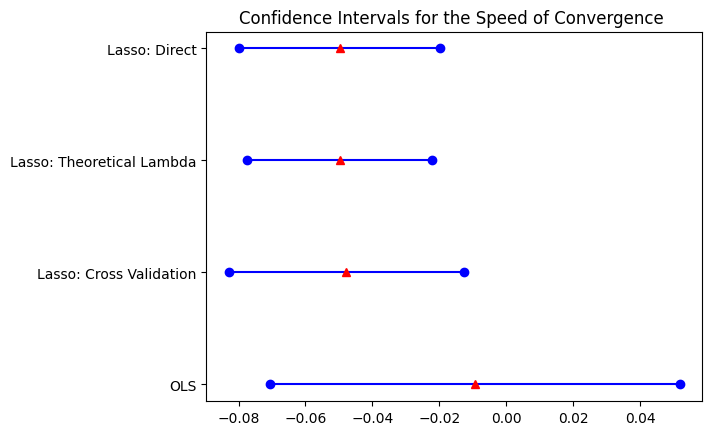

In [22]:
for lower,upper,coef,y in zip(summary['lower bound CI'],summary['upper bound CI'],summary['Estimator'],range(len(summary))):
    plt.plot((lower,upper),(y,y),'o-',color='blue')
    plt.plot(coef,y,'^',color='red')

plt.yticks(range(len(summary)),list(['OLS', 'Lasso: Cross Validation', 'Lasso: Theoretical Lambda', 'Lasso: Direct']))
plt.title('Confidence Intervals for the Speed of Convergence ')

    
plt.show()

We can comment the next about the results in the graphic

* We reazlize that the OLS method estimates a $\beta_1$ with the highest standard error.
* The Cross-Validation method estimates a non-statisically significant $\beta_1$. 
* The Lasso methods estimate a statistically significant $\beta_1 = -0.048$ approximately.
* We can confirm the convergence hypothesis: poor countries grow faster than wealthier countries.